In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve, minimize
import sympy

from sympy.utilities.lambdify import lambdify
def opt_schools_via_scipy(k, gamma):
    # create variables (x[0] will not be used -- placeholder so that x[i] = x_i)
    x = sympy.symbols('x0:%d'%(k+1))
    initial_sol = np.zeros(k)
    # initial_sol = np.asarray([ 1 - i/(k+1) for i in range(1, k+1) ])  # CAUTION: often behaves poorly (i.e. does not converge)

    # handle i=1 separately
    biased_payoff = gamma * (1 - x[1]) * x[1]**2 + x[1] * (1 - x[1])
    true_payoff = x[1] * (1 - x[1])

    for i in range(2, k+1):
        biased_payoff += gamma * (1 - x[i]) * x[i]**2 + x[i] * (x[i-1] - x[i])
        true_payoff += x[i] * (x[i-1] - x[i])

    # lambdify for use with scipy
    x_port = np.array(x[1:])
    biased_payoff_func = lambdify(x_port, biased_payoff)
    true_payoff_func = lambdify(x_port, true_payoff)

    # weird vector stuff idk, multiply by -1 so that we can minimize
    def biased_func_v(x):
        return -1 * biased_payoff_func(*tuple(x))

    def true_func_v(x):
        return -1 * true_payoff_func(*tuple(x))
    
    results = minimize(biased_func_v, initial_sol,options={'maxiter': 1000})
    
    return results.x, -1 * biased_func_v(results.x), -1 * true_func_v(results.x)

# Function to get port[0] for a given gamma
def get_port(k,gamma,i):
    port, _, _ = opt_schools_via_scipy(k, gamma)
    return port[i]

# Function to get port[0] for a given gamma
def get_all_port(k,gamma):
    port, _, _ = opt_schools_via_scipy(k, gamma)
    return port

# Define the function f(x)
def f(x):
    return 3*x**2 - 2*x

#Compute a lower bound on x_1 for k=5
def lb(gamma):
    return (5/6 + (gamma/6) * (f(1/6 + 5/2 * gamma) + 
                             2*f(1/3) + 
                             3*f(1/2 - 3/2 * gamma) + 
                             4*f(2/3 - 4/3 * gamma) + 
                             5*f(5/6 - 5/6 * gamma)))

In [155]:
# Generate gamma values from -1 to 0
gamma_values = np.linspace(0, 0.04, 100)
k=60

# Calculate port[0] for each gamma value
x1_values = np.array([get_port(k,-g,0) for g in gamma_values])
x2_values = np.array([get_port(k,-g,1) for g in gamma_values])
x3_values = np.array([get_port(k,-g,2) for g in gamma_values])
x4_values = np.array([get_port(k,-g,3) for g in gamma_values])
x5_values = np.array([get_port(k,-g,4) for g in gamma_values])
#x11_values = np.array([get_port(k,-g,10) for g in gamma_values])

# Plot the results
plt.plot(gamma_values, x1_values, label='$x_1$')
plt.plot(gamma_values, x2_values, label='$x_2$')
plt.plot(gamma_values, x3_values, label='$x_3$')
plt.plot(gamma_values, x4_values, label='$x_4$')
plt.plot(gamma_values, x5_values, label='$x_5$')
plt.legend(fontsize=12)
#plt.plot(gamma_values, x10_values, label='$x_{10}$')
#plt.plot(gamma_values, x11_values, label='$x_{11}$')

#plt.xlabel('gamma')
#plt.ylabel('school')
#plt.title('x1,x2,x3,x4 values')
#plt.figure(figsize=(12, 3))

plt.legend()
plt.tight_layout()
plt.savefig('gamma-k=60-top5.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [112]:
# Assuming get_all_port(k, gamma) is defined as per your function
k=25
x = get_all_port(k, -0.1)

# Define the function f(i) based on the x values obtained
def f(i, x):
    if i == 1:
        return 1 - x[i-1]
    else:
        return x[i-2] - x[i-1]

# Compute f values for i from 1 to 50
f_values = [f(i, x) for i in range(1, k+1)]

# Plot the f values
plt.figure(figsize=(12, 3))
plt.plot(range(1, k+1), f_values, marker='o', linestyle='', color='blue')
#plt.plot(range(1, k+1), x, marker='x', linestyle='', color='red')
#plt.title('Function Values of f(i)')
plt.xlabel('i', fontsize=12)
plt.ylabel('$\Delta_i$', fontsize=12)
plt.tight_layout()
#plt.grid(True)
#plt.axis('on')
plt.savefig('deltas.pdf', format='pdf')
plt.show()

In [156]:
gamma_values = np.linspace(0, 0.0025, 100)
k=60

# Calculate port[0] for each gamma value
x10_values = np.array([get_port(k,-g,9) for g in gamma_values])
x11_values = np.array([get_port(k,-g,10) for g in gamma_values])
x12_values = np.array([get_port(k,-g,11) for g in gamma_values])
x13_values = np.array([get_port(k,-g,12) for g in gamma_values])


# Plot the results
plt.plot(gamma_values, x10_values, label='$x_{10}$')
plt.plot(gamma_values, x11_values, label='$x_{11}$')
plt.plot(gamma_values, x12_values, label='$x_{12}$')
plt.plot(gamma_values, x13_values, label='$x_{13}$')
plt.axhline(y=x10_values[0], color='r', linestyle='--')
plt.axhline(y=x11_values[0], color='r', linestyle='--')
plt.axhline(y=x12_values[0], color='r', linestyle='--')
plt.axhline(y=x13_values[0], color='r', linestyle='--')
#plt.plot(gamma_values, x11_values, label='$x_{11}$')

#plt.xlabel('gamma')
#plt.ylabel('school')
#plt.title('x1,x2,x3,x4 values')
plt.legend()
plt.savefig('gamma-k=60-10-13.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [142]:



# Generate gamma values from -1 to 0
gamma_values = np.linspace(0, 0.02, 101)
k=5

# Calculate port[0] for each gamma value
x1_values = np.array([get_port(k,-g,0) for g in gamma_values])
lb_values = [lb(g) for g in gamma_values] 



# Plot the results
plt.plot(gamma_values, x1_values, label='x1')
plt.plot(gamma_values, lb_values, label='lowerbound')
plt.gca().set_aspect(4)
plt.xlabel(r'$\gamma$',fontsize=12)
plt.ylabel('Top school',fontsize=12)
plt.axhline(y=5/6, color='r', linestyle='--', label='5/6')
plt.tight_layout()
plt.savefig('gamma-1-k5-lower-1.pdf', format='pdf', bbox_inches='tight')
plt.show()

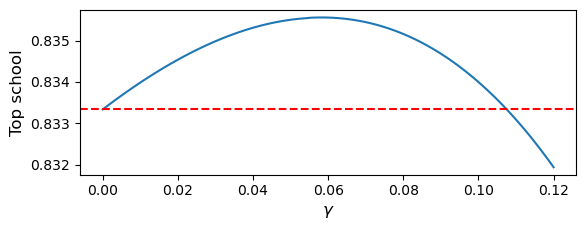

In [141]:
# Generate gamma values from -1 to 0
gamma_values = np.linspace(0, 0.12, 101)
k=5

# Calculate port[0] for each gamma value
x1_values = np.array([get_port(k,-g,0) for g in gamma_values])

# Plot the results
plt.plot(gamma_values, x1_values, label='x1')
plt.gca().set_aspect(11)
plt.xlabel(r'$\gamma$',fontsize=12)
plt.ylabel('Top school',fontsize=12)
plt.axhline(y=5/6, color='r', linestyle='--', label='5/6')
#plt.tight_layout()
plt.savefig('gamma-1-k5-1.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [2]:
# code for Fig 1
port, biased_u, true_u = opt_schools_via_scipy(k=100, gamma=-0.1) 

sns.set_style("ticks")

fig, ax = plt.subplots(figsize = (18,2))
sns.stripplot(ax=ax, data=port, jitter=False, orient="h", s=12)
# sns.catplot(ax=ax, data=port, kind="strip", jitter=False, orient="h", s=20)

ax.set_xlim(-0.05, 1.05)
ax.tick_params(left=False, labelsize=20)
ax.set(ylabel=None)
ax.set_yticks([])
sns.despine(left=True)

plt.xlabel("Schools", size=20)
plt.title("Biased Portfolio, $k = 100$, $\gamma = 0.1$", size=24)

# plt.savefig("biased_100_001_nojitter.png", format='png', bbox_inches='tight')

NameError: name 'sns' is not defined